In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -q /content/drive/MyDrive/Technical_test_font.zip -d /content

!ls /content/Technical_test_fonta


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
replace /content/__MACOSX/._Technical_test_font? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/__MACOSX/._Technical_test_font? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
A

# EDA

In [1]:
#from pathlib import Path
#import pandas as pd

# point to your word dataset (adjust if needed)
#ROOT = Path('/content/Technical_test_font/dataset_word_color')
#assert ROOT.exists(), "dataset_word_color not found at the given path."

#rows = []
#for font_dir in sorted([d for d in ROOT.iterdir() if d.is_dir()]):
 #   font = font_dir.name
  #  for p in font_dir.glob('*.png'):
   #     rows.append({
    #        "FileName": p.name,
     #       "Font": font,
      #      "image_path": str(p)
       # })

#df = pd.DataFrame(rows)
#print("Total images:", len(df), "| Fonts:", df["Font"].nunique())
#df.head()


In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 491.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 9.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 24.3 MB/s eta 0:00:00


In [3]:
from pathlib import Path
import pandas as pd
import zipfile
import time

zip_path = Path("/workspace/bouth_code/dataset.zip")
extract_dir = Path("/workspace/bouth_code/dataset_word_color")

if not extract_dir.exists():
    start_time = time.time()
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        total_files = len(file_list)
        print(f"Extracting {total_files} files from {zip_path.name}...")
        
        for i, file in enumerate(file_list, start=1):
            zip_ref.extract(file, "/workspace/bouth_code")
            if i % 500 == 0 or i == total_files:
                elapsed = time.time() - start_time
                pct = (i / total_files) * 100
                print(f"[{pct:.1f}%] {i}/{total_files} files extracted "
                      f"({elapsed:.1f} sec elapsed)")
    print(f"Extraction complete in {time.time() - start_time:.1f} seconds.")

ROOT = extract_dir
assert ROOT.exists(), f"{ROOT.name} not found at {ROOT.parent}"

rows = []
for font_dir in sorted([d for d in ROOT.iterdir() if d.is_dir()]):
    font = font_dir.name
    for p in font_dir.glob("*.png"):
        rows.append({
            "FileName": p.name,
            "Font": font,
            "image_path": str(p)
        })

df = pd.DataFrame(rows)
print("Total images:", len(df), "| Fonts:", df["Font"].nunique())
df.head()


Extracting 2362390 files from dataset.zip...
[0.0%] 500/2362390 files extracted (23.1 sec elapsed)
[0.0%] 1000/2362390 files extracted (23.2 sec elapsed)
[0.1%] 1500/2362390 files extracted (23.3 sec elapsed)
[0.1%] 2000/2362390 files extracted (23.4 sec elapsed)
[0.1%] 2500/2362390 files extracted (23.5 sec elapsed)
[0.1%] 3000/2362390 files extracted (23.6 sec elapsed)
[0.1%] 3500/2362390 files extracted (23.7 sec elapsed)
[0.2%] 4000/2362390 files extracted (23.8 sec elapsed)
[0.2%] 4500/2362390 files extracted (23.9 sec elapsed)
[0.2%] 5000/2362390 files extracted (24.0 sec elapsed)
[0.2%] 5500/2362390 files extracted (24.1 sec elapsed)
[0.3%] 6000/2362390 files extracted (24.2 sec elapsed)
[0.3%] 6500/2362390 files extracted (24.3 sec elapsed)
[0.3%] 7000/2362390 files extracted (24.4 sec elapsed)
[0.3%] 7500/2362390 files extracted (24.5 sec elapsed)
[0.3%] 8000/2362390 files extracted (24.6 sec elapsed)
[0.4%] 8500/2362390 files extracted (24.7 sec elapsed)
[0.4%] 9000/2362390 f

AssertionError: dataset_word_color not found at /workspace/bouth_code

In [1]:
import tensorflow as tf
from tensorflow.python.platform import build_info as bi
print("TF:", tf.__version__)
print("CUDA:", bi.build_info.get("cuda_version"))
print("cuDNN:", bi.build_info.get("cudnn_version"))
print("GPUs:", tf.config.list_physical_devices("GPU"))


2025-08-13 11:32:10.652908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VersionError: Detected mismatched Protobuf Gencode/Runtime major versions when loading tensorflow/core/framework/attr_value.proto: gencode 6.31.1 runtime 5.29.5. Same major version is required. See Protobuf version guarantees at https://protobuf.dev/support/cross-version-runtime-guarantee.

In [1]:
from pathlib import Path
import pandas as pd

ROOT = Path("/workspace/bouth_code/Technical_test_font/dataset_word_color")
assert ROOT.exists(), "dataset_word_color not found."

rows = []
for font_dir in sorted(ROOT.iterdir()):
    if font_dir.is_dir():
        for p in font_dir.glob("*.png"):
            rows.append({
                "FileName": p.name,
                "Font": font_dir.name,
                "image_path": str(p)
            })

df = pd.DataFrame(rows)
print("Total images:", len(df), "| Fonts:", df["Font"].nunique())
df.head()


Total images: 349120 | Fonts: 23


,FileName,Font,image_path
0,34868bd1-0174-4062-b6c1-ed8d549e5f21.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...
1,8e5b4992-8dad-4bec-8c01-57a8e458f8cb.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...
2,7c0f4c97-9f2d-4ee8-b1f3-91f44c1f8b2c.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...
3,b3aa2f22-8a9a-4f7c-85a0-f70b8963af94.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...
4,7bf51372-d3ca-4e3b-9b06-fcd59a2715b8.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...


In [2]:
df['Font'].value_counts()

Font
Oswald-Regular            19420
Oswald-Bold               19123
Roboto-Bold               18706
TimesNRMTPro-Bold         18058
ITCGaramondStd-Bd         17857
Aller_Bd                  17847
Roboto-Regular            17320
OpenSans-Bold             17013
BaskervillePro-Bold       16796
Sentinel-Bold             16753
Antonio-Bold              16661
Antonio-Regular           16259
OpenSans-Regular          16106
ChronicleDeck-Bold        15939
ITCGaramondStd-Bk         14979
Sentinel-Book             14749
TimesNRMTPro              14284
BaskervillePro-Regular    13656
ChronicleDeck-Roman       11931
AllerDisplay              11174
Antonio-Light             10269
SEASRN__                   9378
Amatic-Bold                4842
Name: count, dtype: int64

In [3]:
hist=df['Font'].value_counts()

In [4]:
import matplotlib.pyplot as plt

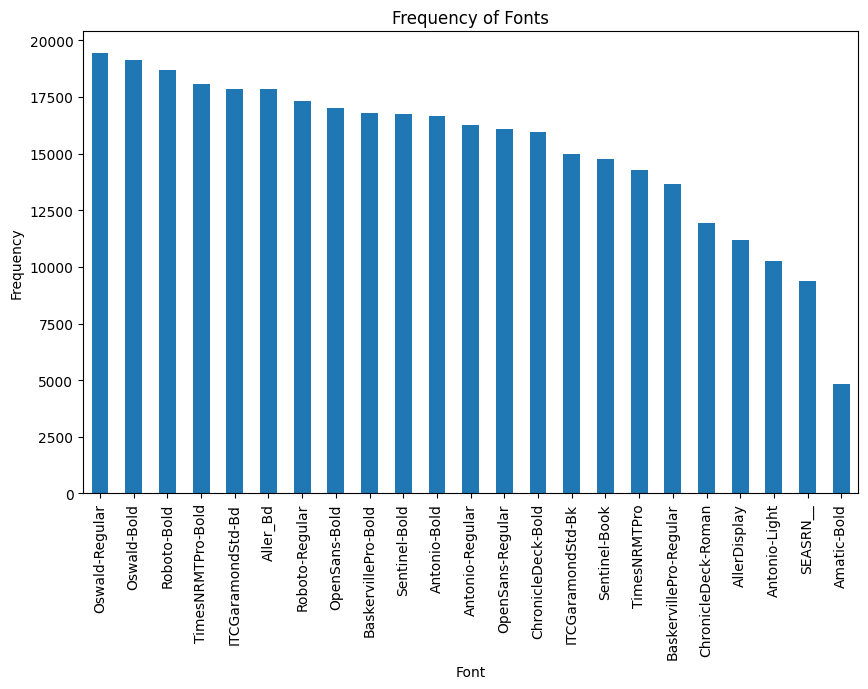

In [5]:
plt.figure(figsize=(10,6))
hist.plot(kind='bar')
plt.title('Frequency of Fonts')
plt.xlabel('Font')
plt.ylabel('Frequency')
plt.show()

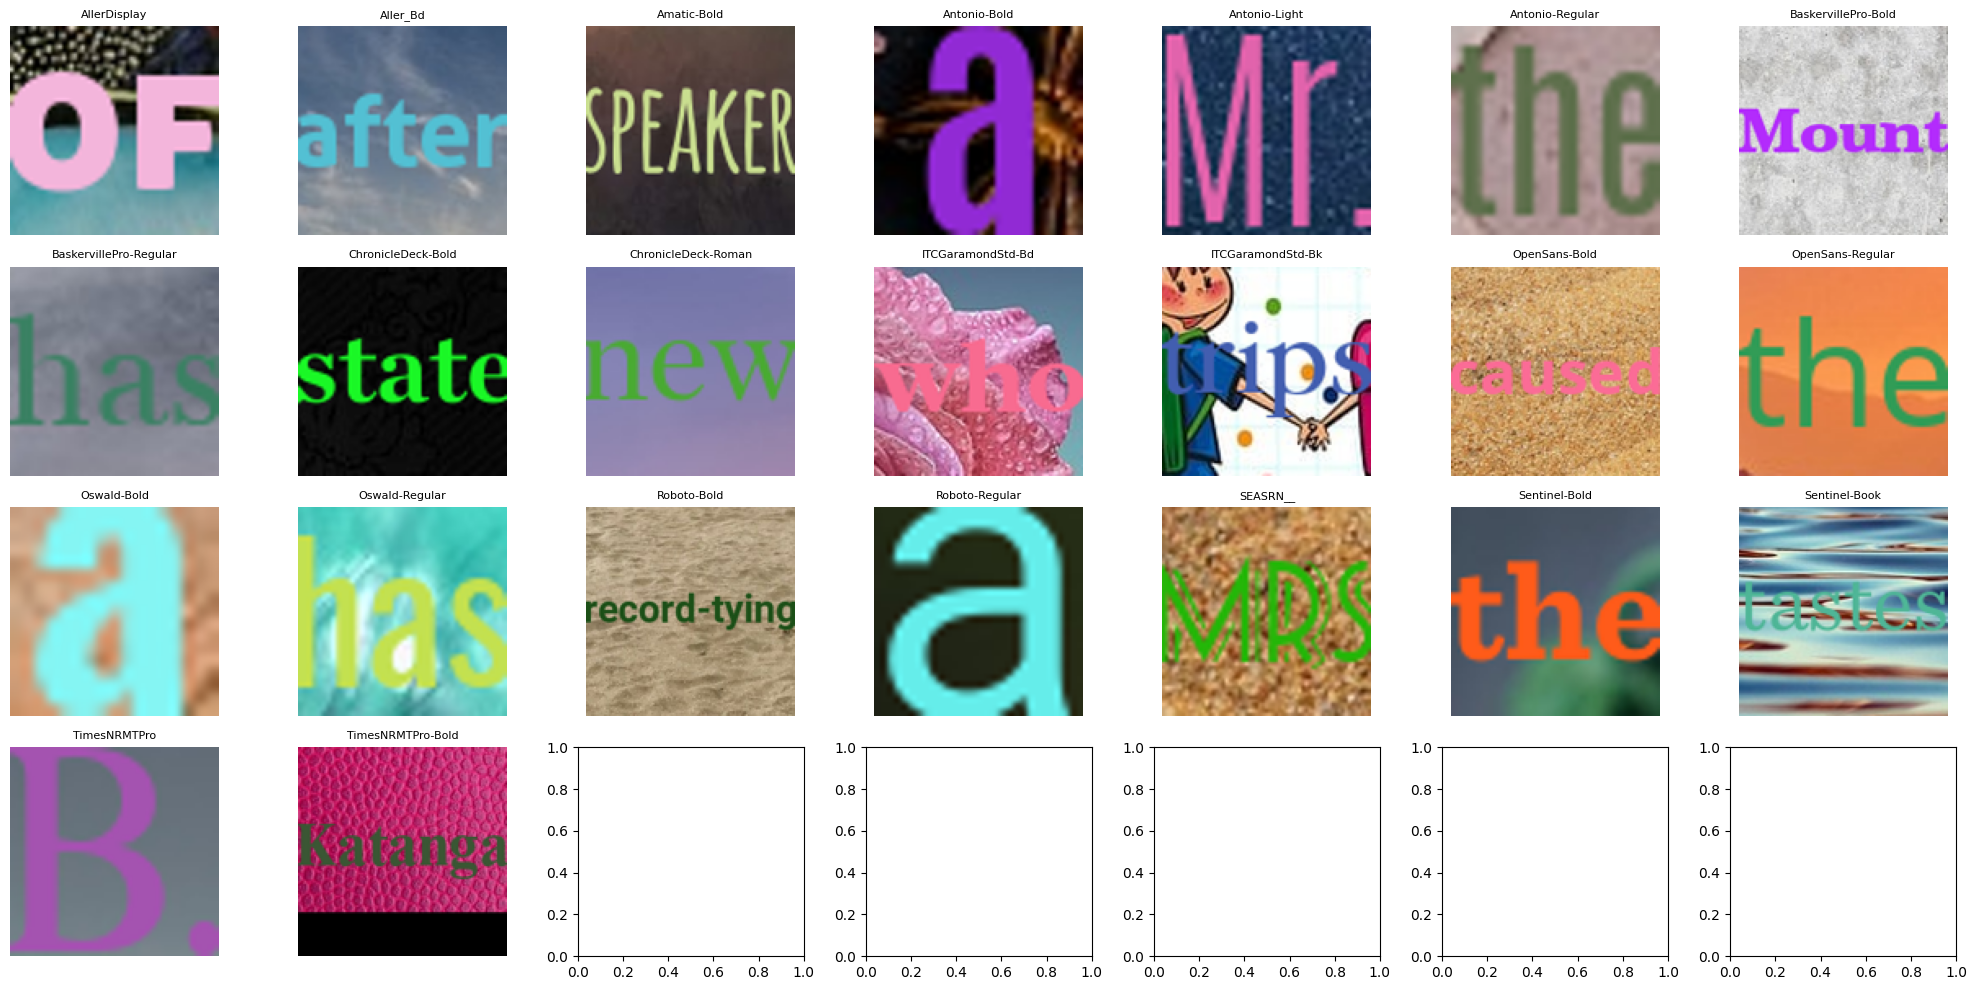

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# sample one image per font
sample_df = df.groupby("Font").sample(1, random_state=42).reset_index(drop=True)

# define grid size
n_cols =7
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for ax, (_, row) in zip(axes.flat, sample_df.iterrows()):
    img = Image.open(row["image_path"])
    ax.imshow(img)
    ax.set_title(row["Font"], fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Dataset preparation



In [7]:
fonts = sorted(df["Font"].unique())
font_to_id = {f:i for i,f in enumerate(fonts)}
id_to_font = {i:f for f,i in font_to_id.items()}

df["label_id"] = df["Font"].map(font_to_id)

print("Num classes:", len(fonts))
print("Example mapping:", list(font_to_id.items())[:5])
df.head()


Num classes: 23
Example mapping: [('AllerDisplay', 0), ('Aller_Bd', 1), ('Amatic-Bold', 2), ('Antonio-Bold', 3), ('Antonio-Light', 4)]


,FileName,Font,image_path,label_id
0,34868bd1-0174-4062-b6c1-ed8d549e5f21.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...,0
1,8e5b4992-8dad-4bec-8c01-57a8e458f8cb.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...,0
2,7c0f4c97-9f2d-4ee8-b1f3-91f44c1f8b2c.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...,0
3,b3aa2f22-8a9a-4f7c-85a0-f70b8963af94.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...,0
4,7bf51372-d3ca-4e3b-9b06-fcd59a2715b8.png,AllerDisplay,/workspace/bouth_code/Technical_test_font/data...,0


### train test split

In [8]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label_id"],
    random_state=42
)

print("Train size:", len(train_df), " | Val size:", len(val_df))
print("Classes in train:", train_df['label_id'].nunique(), "| in val:", val_df['label_id'].nunique())


Train size: 279296  | Val size: 69824
Classes in train: 23 | in val: 23


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",   # one-hot labels
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

train_gen.class_indices


2025-08-13 11:22:51.432317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755084171.456749    6949 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755084171.464911    6949 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755084171.484425    6949 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755084171.484450    6949 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755084171.484453    6949 computation_placer.cc:177] computation placer alr

Found 279296 validated image filenames belonging to 23 classes.
Found 69824 validated image filenames belonging to 23 classes.


{'AllerDisplay': 0,
 'Aller_Bd': 1,
 'Amatic-Bold': 2,
 'Antonio-Bold': 3,
 'Antonio-Light': 4,
 'Antonio-Regular': 5,
 'BaskervillePro-Bold': 6,
 'BaskervillePro-Regular': 7,
 'ChronicleDeck-Bold': 8,
 'ChronicleDeck-Roman': 9,
 'ITCGaramondStd-Bd': 10,
 'ITCGaramondStd-Bk': 11,
 'OpenSans-Bold': 12,
 'OpenSans-Regular': 13,
 'Oswald-Bold': 14,
 'Oswald-Regular': 15,
 'Roboto-Bold': 16,
 'Roboto-Regular': 17,
 'SEASRN__': 18,
 'Sentinel-Bold': 19,
 'Sentinel-Book': 20,
 'TimesNRMTPro': 21,
 'TimesNRMTPro-Bold': 22}

Sanity check

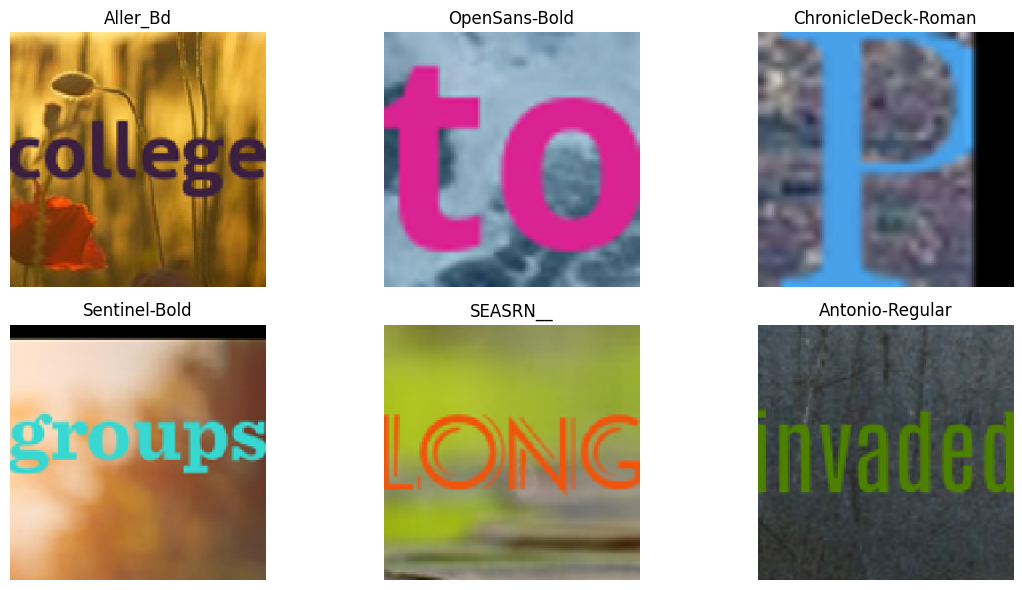

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_batch, y_batch = next(train_gen)

idx_to_class = {v:k for k,v in train_gen.class_indices.items()}
labels = np.argmax(y_batch, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(idx_to_class[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Baseline model

In [11]:
# number of classes = size of the class mapping dict
num_classes = len(train_gen.class_indices)
num_classes


23

# Baseline CNN model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,789,527 (98.38 MB)

 Trainable params: 25,789,527 (98.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Steps per epoch so Keras knows how many batches to run
steps_per_epoch = int(np.ceil(train_gen.n / train_gen.batch_size))
val_steps = int(np.ceil(val_gen.n / val_gen.batch_size))

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=3,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 986s 112ms/step - accuracy: 0.2214 - loss: 2.5068 - val_accuracy: 0.6239 - val_loss: 1.1528
Epoch 2/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 905s 97ms/step - accuracy: 0.5694 - loss: 1.2627 - val_accuracy: 0.7032 - val_loss: 0.8839
Epoch 3/3
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 806s 92ms/step - accuracy: 0.6503 - loss: 1.0020 - val_accuracy: 0.7279 - val_loss: 0.8009


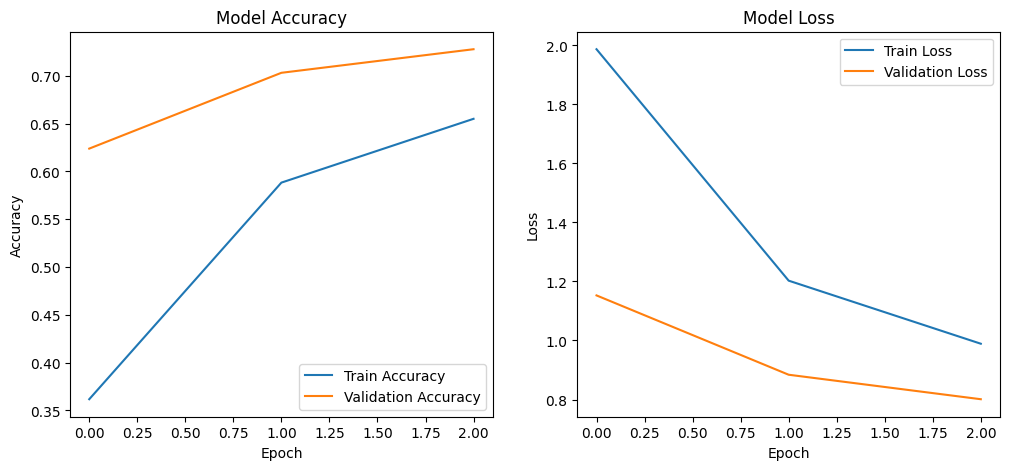

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


2182/2182 ━━━━━━━━━━━━━━━━━━━━ 154s 69ms/step


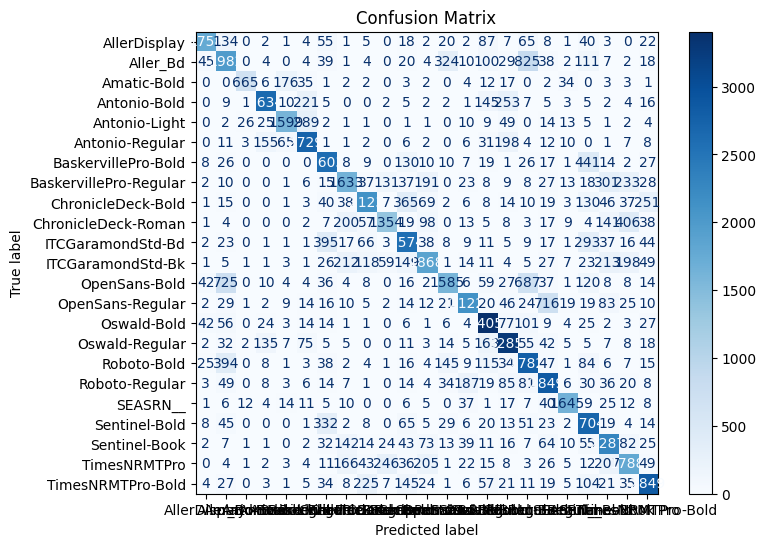

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_gen.reset()
y_pred_probs = model.predict(val_gen, steps=val_steps)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred)

class_names = list(val_gen.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


 Model Performance:
Accuracy : 0.7279
Precision: 0.7349
Recall   : 0.7279
F1-score : 0.7265

Classification Report:
                        precision    recall  f1-score   support

          AllerDisplay       0.90      0.79      0.84      2235
              Aller_Bd       0.55      0.56      0.55      3569
           Amatic-Bold       0.93      0.69      0.79       968
          Antonio-Bold       0.87      0.79      0.83      3332
         Antonio-Light       0.84      0.78      0.81      2054
       Antonio-Regular       0.79      0.84      0.82      3252
   BaskervillePro-Bold       0.70      0.77      0.73      3359
BaskervillePro-Regular       0.66      0.60      0.63      2731
    ChronicleDeck-Bold       0.78      0.67      0.72      3188
   ChronicleDeck-Roman       0.74      0.57      0.64      2386
     ITCGaramondStd-Bd       0.70      0.72      0.71      3571
     ITCGaramondStd-Bk       0.71      0.62      0.66      2996
         OpenSans-Bold       0.72      0.47      0.

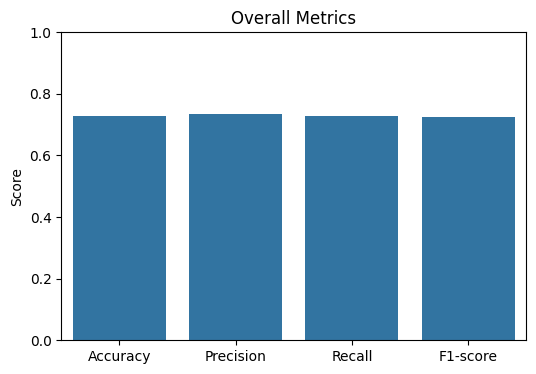

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(" Model Performance:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Overall Metrics")
plt.ylabel("Score")
plt.show()


# VGG 16

In [12]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df,
    test_size=0.20,
    stratify=df["label_id"],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    stratify=temp_df["label_id"],
    random_state=42
)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")
print("Classes:", train_df['label_id'].nunique(), val_df['label_id'].nunique(), test_df['label_id'].nunique())


Train: 279296 | Val: 34912 | Test: 34912
Classes: 23 23 23


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
#here we use the same preprocessing steps used when training VGG16
# 1. Chargent les images et les redimensionnent en 224x224 (taille attendue par VGG16)
# 2. Appliquent le prétraitement spécifique à VGG16 :
#  Conversion des images de RGB vers BGR (format utilisé pour l’entraînement original de VGG16)
#  Soustraction des valeurs moyennes des pixels ImageNet pour chaque canal
#      (B : 103.939, G : 116.779, R : 123.680)
# Cela permet de reproduire les mêmes conditions que lors de l’entraînement original de VGG16,
# afin que l’apprentissage par transfert fonctionne correctement.
train_datagen_vgg = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen_vgg   = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_vgg  = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_gen_vgg = train_datagen_vgg.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

num_classes = len(train_gen_vgg.class_indices)
num_classes


Found 279296 validated image filenames belonging to 23 classes.


23

In [ ]:
val_gen_vgg = val_datagen_vgg.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 34912 validated image filenames belonging to 23 classes.


In [ ]:
test_gen_vgg = test_datagen_vgg.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="Font",
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # garder l eme ordre
)


Found 34912 validated image filenames belonging to 23 classes.


### VGG SIMPLE

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

num_classes = len(train_gen_vgg.class_indices)

#  Charger VGG16 sans la tete de classification (include_top=False)
base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# pas d'entrainement juste du transfer learning
for layer in base.layers:
    layer.trainable = False

#  adapter la sortie pour notre cas d'usage 23 classes
## No regularization
x = layers.GlobalAveragePooling2D()(base.output)
out = layers.Dense(num_classes, activation='softmax')(x)

model_vgg_plain = models.Model(inputs=base.input, outputs=out)
model_vgg_plain.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg_plain.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 23)             │        11,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,726,487 (56.18 MB)

 Trainable params: 11,799 (46.09 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg_plain = model_vgg_plain.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=5,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 1606s 182ms/step - accuracy: 0.2569 - loss: 2.9878 - val_accuracy: 0.3490 - val_loss: 2.2317
Epoch 2/5
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 1586s 182ms/step - accuracy: 0.3465 - loss: 2.2438 - val_accuracy: 0.3383 - val_loss: 2.2939
Epoch 3/5
8728/8728 ━━━━━━━━━━━━━━━━━━━━ 1642s 182ms/step - accuracy: 0.3484 - loss: 2.2389 - val_accuracy: 0.3446 - val_loss: 2.2288
Epoch 4/5
4793/8728 ━━━━━━━━━━━━━━━━━━━━ 10:38 162ms/step - accuracy: 0.3523 - loss: 2.2295

We stopped training because the validation accuracy stayed stuck at 34%, showing no improvement this suggests the learning rate might be too high or the frozen VGG16 features aren’t adapting to our dataset next, we’ll lower the learning rate to see if accuracy improves; if not, we’ll unfreeze the last VGG16 block for finetuning.

---



In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')



### VGG with adapted learning rate

In [ ]:
from tensorflow.keras import optimizers

# Re-compile the SAME model with a smaller LR
model_vgg_plain.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),  # ↓ from default 1e-3
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Quick probe run (short) just to see if val_acc moves
history_lr1e4 = model_vgg_plain.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=1,
    verbose=1
)


   7/8728 ━━━━━━━━━━━━━━━━━━━━ 47:05:17 19s/step - accuracy: 0.0490 - loss: 9.5479

KeyboardInterrupt: 

# Efficient net B3 

In [13]:
# Cell 1: imports & config
import math
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import efficientnet as effnet

SEED            = 42
BATCH_SIZE      = 32
IMG_SIZE        = (300, 300)    
INITIAL_LR      = 1e-3          
FINETUNE_LR     = 2e-4           
EPOCHS_HEAD     = 10
EPOCHS_FINETUNE = 20
WEIGHT_DECAY    = 1e-4           


### data preparation for efficientNet B3 

In [14]:
def make_efficientnet_b3_generators(train_df, val_df, test_df,
                                    x_col="image_path", y_col="Font",
                                    batch_size=BATCH_SIZE, seed=SEED):
    preprocess = effnet.preprocess_input  # model-specific normalization

    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess,
        rotation_range=5,
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.05,
        shear_range=0.02,
        fill_mode="nearest"
    )
    eval_datagen = ImageDataGenerator(preprocessing_function=preprocess)

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col=x_col, y_col=y_col,
        target_size=IMG_SIZE, batch_size=batch_size,
        class_mode="categorical", shuffle=True, seed=seed
    )
    val_gen = eval_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col=x_col, y_col=y_col,
        target_size=IMG_SIZE, batch_size=batch_size,
        class_mode="categorical", shuffle=False, seed=seed
    )
    test_gen = eval_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col=x_col, y_col=y_col,
        target_size=IMG_SIZE, batch_size=batch_size,
        class_mode="categorical", shuffle=False, seed=seed
    )

    num_classes = len(train_gen.class_indices)
    return train_gen, val_gen, test_gen, num_classes

train_gen_b3, val_gen_b3, test_gen_b3, NUM_CLASSES = make_efficientnet_b3_generators(
    train_df, val_df, test_df
)


Found 279296 validated image filenames belonging to 23 classes.
Found 34912 validated image filenames belonging to 23 classes.
Found 34912 validated image filenames belonging to 23 classes.


### Model buidling 

In [16]:
def build_efficientnet_b3(num_classes, input_shape=(300, 300, 3),
                          dropout_rate=0.3, weight_decay=WEIGHT_DECAY):
    backbone = effnet.EfficientNetB3(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape,
        pooling="avg"
    )
    x = layers.Dropout(dropout_rate)(backbone.output)
    outputs = layers.Dense(
        num_classes,
        activation="softmax",
        kernel_regularizer=regularizers.l2(weight_decay)
    )(x)

    model = models.Model(inputs=backbone.input, outputs=outputs, name="EfficientNetB3-Fonts")
    return model, backbone

model, backbone = build_efficientnet_b3(NUM_CLASSES, input_shape=(*IMG_SIZE, 3))
model.summary()


W0000 00:00:1755084197.972352    6949 gpu_device.cc:2430] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1755084198.025008    6949 gpu_device.cc:2430] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1755084198.271050    6949 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9815 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070, pci bus id: 0000:02:00.0, compute capability: 12.0
2025-08-13 11:23:18.564216: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleLoadData(&module, data)' failed with 'CUDA_ERROR_INVALID_PTX'

2025-08-13 11:23:18.564240: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleGetFunction

InternalError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE' [Op:Cast] name: 